In [68]:
import numpy as np
from array import array
import os
import sys
import ROOT
from ROOT import TVectorD, TMatrix, TMath, TVector3, TGraphErrors, TFile, TTree, gRandom, gPad, gROOT, gVirtualX, kTRUE, kRed, TProfile, gStyle,  TFile, gSystem
from fastSimulation import *

In [69]:
folder="${fastMCKalman}/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/"
#folder="/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCSA/"
inputData = folder+"fastParticle.list"
ROOT.initTreeFast(inputData)
tree=ROOT.treeFast
treeSeed = ROOT.treeSeed

Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS.root
Number of entries	1
0	0	/home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/MC_00005smear_noEloss_

In [70]:
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(tree)
tree.SetAlias("p0MC","part.fParamMC[1].fP[0]")
tree.SetAlias("p0In","part.fParamIn[1].fP[0]")

tree.SetAlias("p1MC","part.fParamMC[1].fP[1]")
tree.SetAlias("p1In","part.fParamIn[1].fP[1]")

tree.SetAlias("p2MC","part.fParamMC[1].fP[2]")
tree.SetAlias("p2In","part.fParamIn[1].fP[2]")

tree.SetAlias("p3MC","part.fParamMC[1].fP[3]")
tree.SetAlias("p3In","part.fParamIn[1].fP[3]")

tree.SetAlias("p4MC","part.fParamMC[1].fP[4]")
tree.SetAlias("p4In","part.fParamIn[1].fP[4]")

tree.SetAlias("pMC","part.fParamMC[1].fData.P()")
tree.SetAlias("pIn","part.fParamIn[1].fData.P()")

tree.SetAlias("Res0MC","(p0In-p0MC)/p0MC")
tree.SetAlias("Res1MC","(p1In-p1MC)/p1MC")
tree.SetAlias("Res2MC","(p2In-p2MC)/p2MC")
tree.SetAlias("Res3MC","(p3In-p3MC)/p3MC")
tree.SetAlias("Res4MC","(p4In-p4MC)/p4MC")
tree.SetAlias("RespMC","(pIn-pMC)/pMC")

tree.SetAlias("sigmaqPt0","sqrt(part.fParamIn[1].fC[14])")
tree.SetAlias("sigmaPtRel0","sigmaqPt0*ptMC")
tree.SetAlias("LArm","getStat(2)")

tree.SetAlias("isOK","part.fStatusMaskIn.fData[1]==31")
#part.fStatusMaskIn.fData[1]==31



True

Warning in <TROOT::Append>: Replacing existing TH1: hstatus (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: cstatus
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/status.png has been created


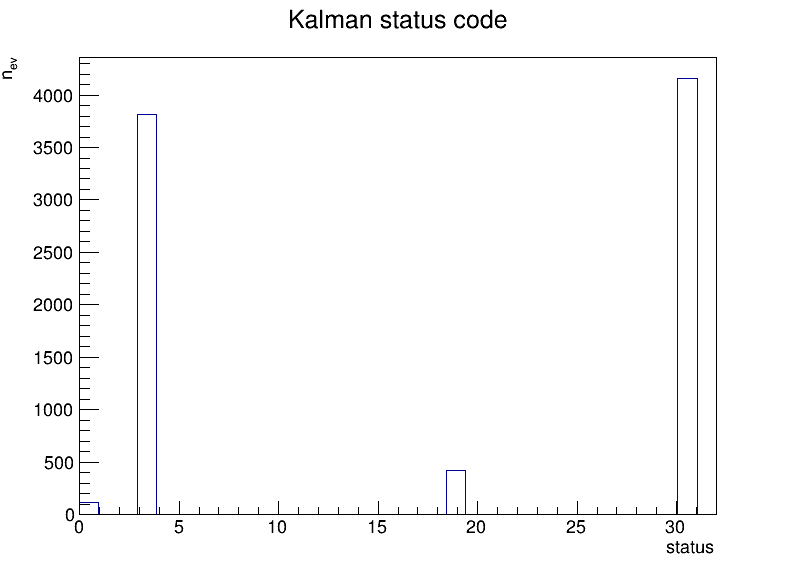

In [78]:
hstatus   = ROOT.TH1D( 'hstatus', 'status', 33, 0, 32 )

for iev in range(tree.GetEntries()):
    tree.GetEntry(iev)
    size = tree.part.fStatusMaskIn.size()
    status=0
    for i in range(size):
        status = tree.part.fStatusMaskIn[size-i-1]
        if(i!=0 and status!=31):
            #print(status)
            break
    if(size!=0): hstatus.Fill(status) 
        

gStyle.SetOptStat(0)
cstatus = ROOT.TCanvas("cstatus","cstatus",800,600)
hstatus.SetTitle("Kalman status code;status;n_{ev}")
hstatus.Draw()
cstatus.Draw()
save=folder+"status"+".png"
cstatus.Print(save)

In [72]:
gStyle.SetOptStat(1)
tree.SetMarkerStyle(25)
tree.SetMarkerSize(0.5)
ROOT.setAliases(treeSeed)
treeSeed.SetAlias("p0MC","input.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("p0Seed","seed.AliExternalTrackParam.fP[0]")
treeSeed.SetAlias("c00Seed","sqrt(seed.AliExternalTrackParam.fC[0])")

treeSeed.SetAlias("p1MC","input.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("p1Seed","seed.AliExternalTrackParam.fP[1]")
treeSeed.SetAlias("c11Seed","sqrt(seed.AliExternalTrackParam.fC[2])")

treeSeed.SetAlias("p2MC","input.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("p2Seed","seed.AliExternalTrackParam.fP[2]")
treeSeed.SetAlias("c22Seed","sqrt(seed.AliExternalTrackParam.fC[5])")

treeSeed.SetAlias("p3MC","input.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("p3Seed","seed.AliExternalTrackParam.fP[3]")
treeSeed.SetAlias("c33Seed","sqrt(seed.AliExternalTrackParam.fC[9])")

treeSeed.SetAlias("p4MC","input.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("p4Seed","seed.AliExternalTrackParam.fP[4]")
treeSeed.SetAlias("c44Seed","sqrt(seed.AliExternalTrackParam.fC[14])")

#treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pMC","abs((1/cos(atan(input.AliExternalTrackParam.fP[3])))/input.AliExternalTrackParam.fP[4])")
treeSeed.SetAlias("pSeed","abs((1/cos(atan(seed.AliExternalTrackParam.fP[3])))/seed.AliExternalTrackParam.fP[4])")

treeSeed.SetAlias("Res0MC","(p0Seed-p0MC)/p0MC")
treeSeed.SetAlias("Res1MC","(p1Seed-p1MC)/p1MC")
treeSeed.SetAlias("Res2MC","(p2Seed-p2MC)/p2MC")
treeSeed.SetAlias("Res3MC","(p3Seed-p3MC)/p3MC")
treeSeed.SetAlias("Res4MC","(p4Seed-p4MC)/p4MC")
treeSeed.SetAlias("RespMC","(pSeed-pMC)/pMC")

treeSeed.SetAlias("Unit0MC","(p0Seed-p0MC)/c00Seed")
treeSeed.SetAlias("Unit1MC","(p1Seed-p1MC)/c11Seed")
treeSeed.SetAlias("Unit2MC","(p2Seed-p2MC)/c22Seed")
treeSeed.SetAlias("Unit3MC","(p3Seed-p3MC)/c33Seed")
treeSeed.SetAlias("Unit4MC","(p4Seed-p4MC)/c44Seed")




True

Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Kalman_p0_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Kalman_p1_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: myCanvasName2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Kalman_p2_Resid.png has been created
Warning in <TCanvas::Constructor>: De

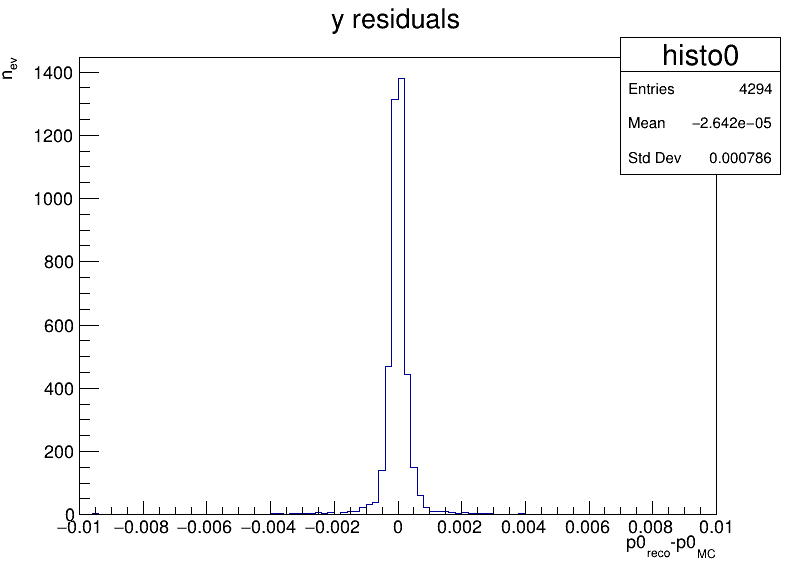

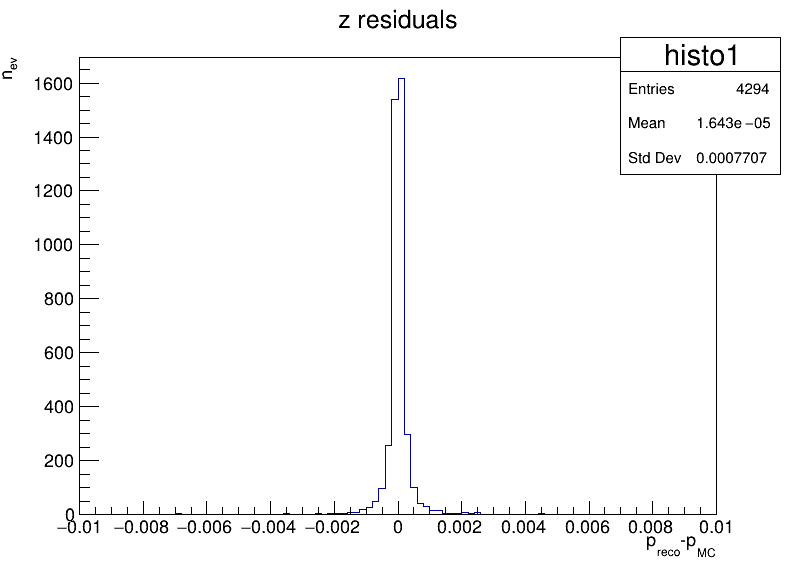

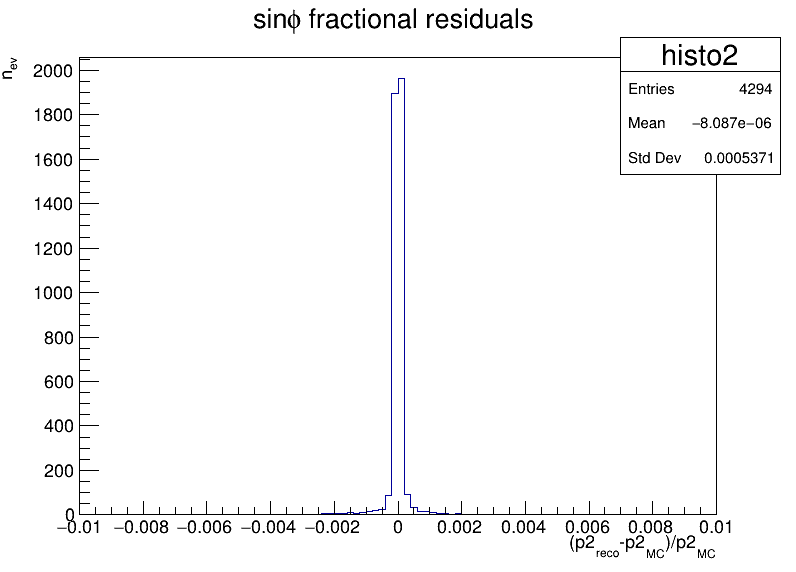

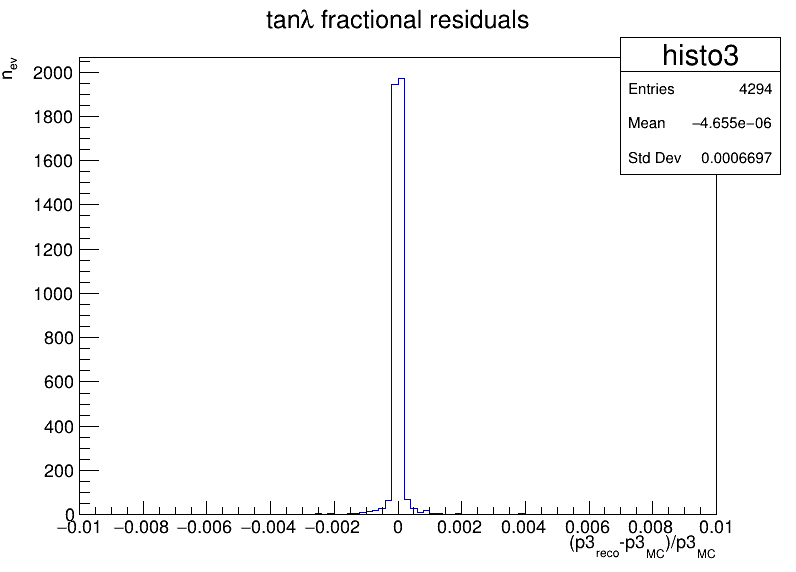

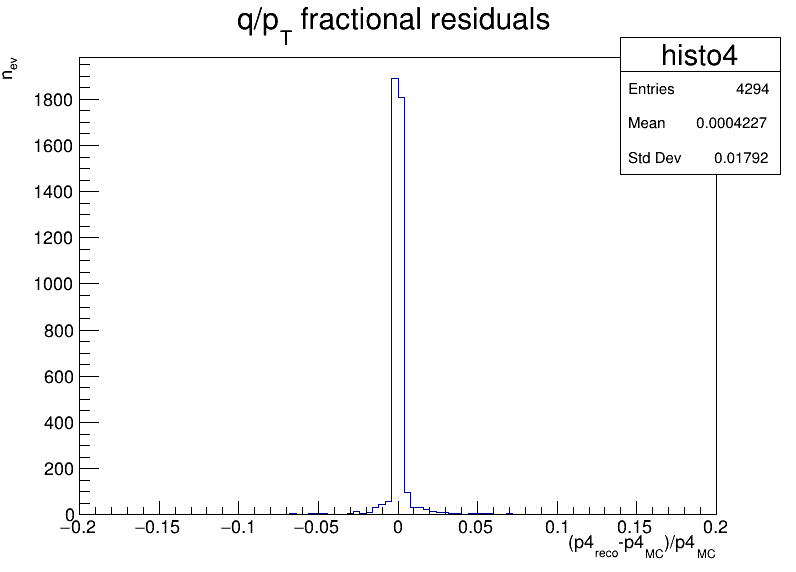

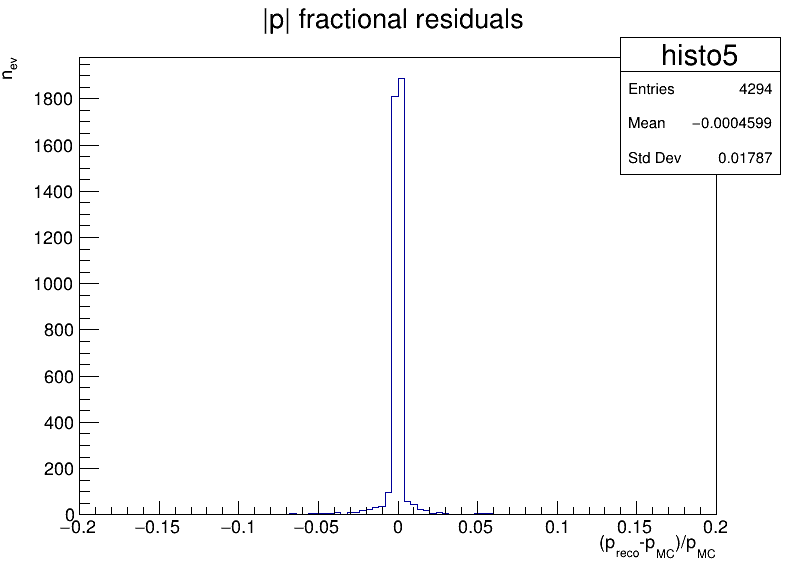

In [73]:
c0 = ROOT.TCanvas("myCanvasName0","The Canvas Title0",800,600)
tree.Draw("(p0In-p0MC)>>histo0(100,-0.01,0.01)","isOK")
histo0 = ROOT.gDirectory.Get("histo0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
c0.Draw()
save=folder+"Kalman_p0_Resid"+".png"
c0.Print(save)

c1 = ROOT.TCanvas("myCanvasName1","The Canvas Title1",800,600)
tree.Draw("(p1In-p1MC)>>histo1(100,-0.01,0.01)","isOK")
histo1 = ROOT.gDirectory.Get("histo1")
histo1.SetTitle("z residuals;p_{reco}-p_{MC};n_{ev}")
c1.Draw()
save=folder+"Kalman_p1_Resid"+".png"
c1.Print(save)

c2 = ROOT.TCanvas("myCanvasName2","The Canvas Title2",800,600)
tree.Draw("Res2MC>>histo2(100,-0.01,0.01)","isOK")
histo2 = ROOT.gDirectory.Get("histo2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
c2.Draw()
save=folder+"Kalman_p2_Resid"+".png"
c2.Print(save)

c3 = ROOT.TCanvas("myCanvasName3","The Canvas Title3",800,600)
tree.Draw("Res3MC>>histo3(100,-0.01,0.01)","isOK")
histo3 = ROOT.gDirectory.Get("histo3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
c3.Draw()
save=folder+"Kalman_p3_Resid"+".png"
c3.Print(save)

c4 = ROOT.TCanvas("myCanvasName4","The Canvas Title4",800,600)
tree.Draw("Res4MC>>histo4(100,-0.2,0.2)","isOK")
histo4 = ROOT.gDirectory.Get("histo4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
c4.Draw()
save=folder+"Kalman_p4_Resid"+".png"
c4.Print(save)


cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
tree.Draw("RespMC>>histo5(100,-0.2,0.2)","isOK")
histo5 = ROOT.gDirectory.Get("histo5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
cp.Draw()
save=folder+"Kalman_p_Resid"+".png"
cp.Print(save)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Helix_p0_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Helix_p1_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Helix_p2_Resid.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Inf

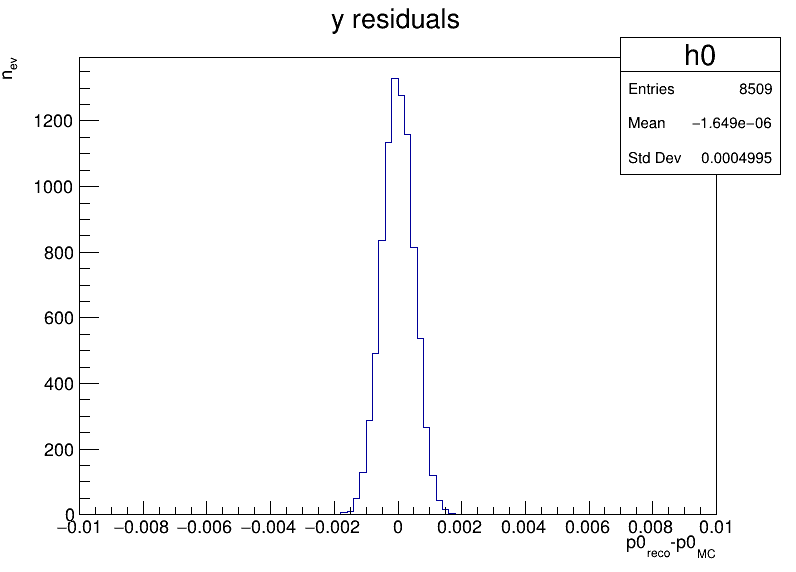

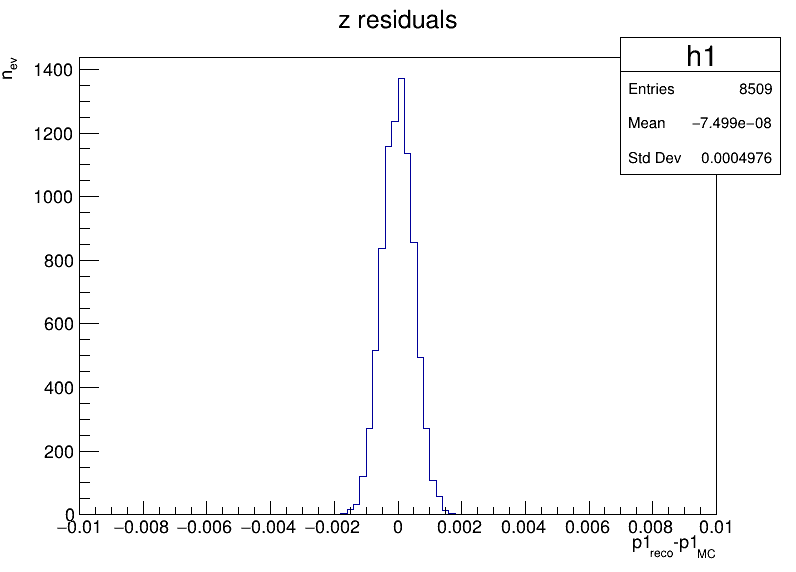

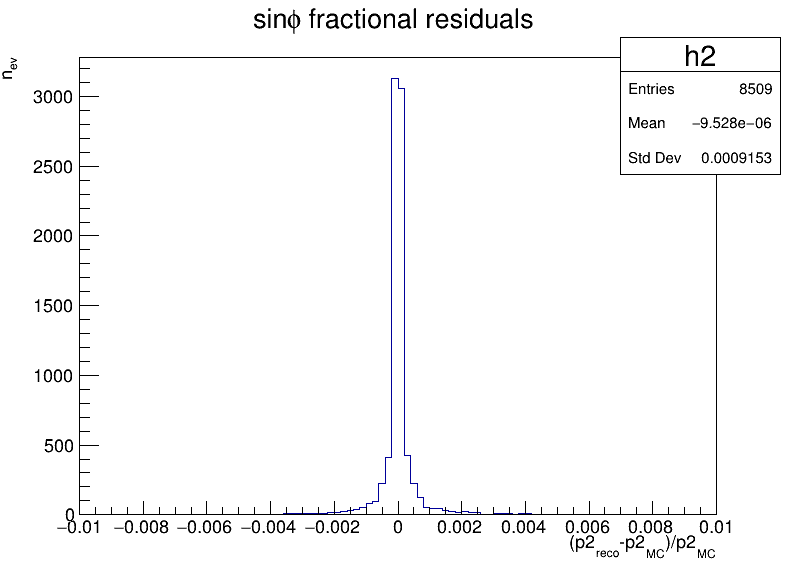

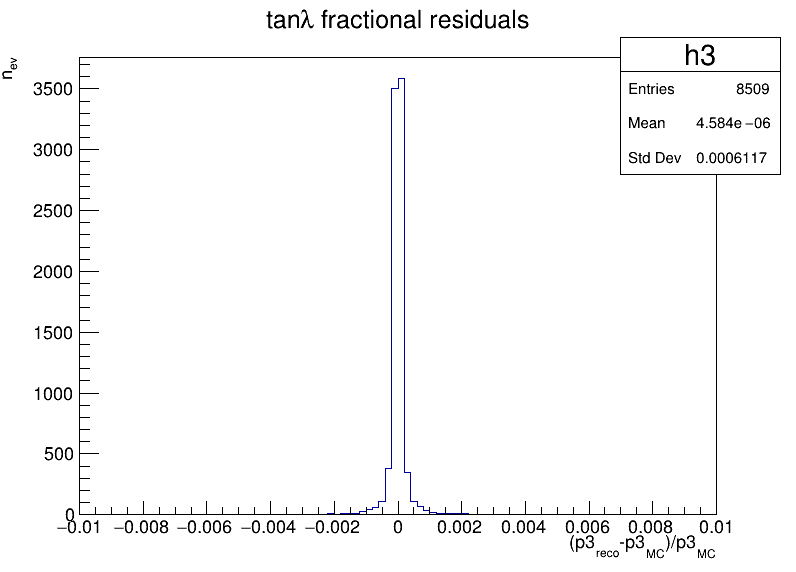

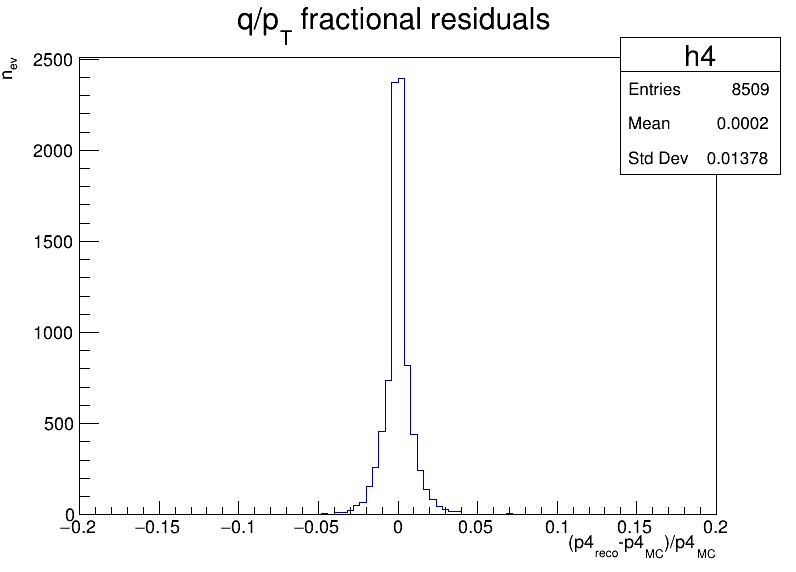

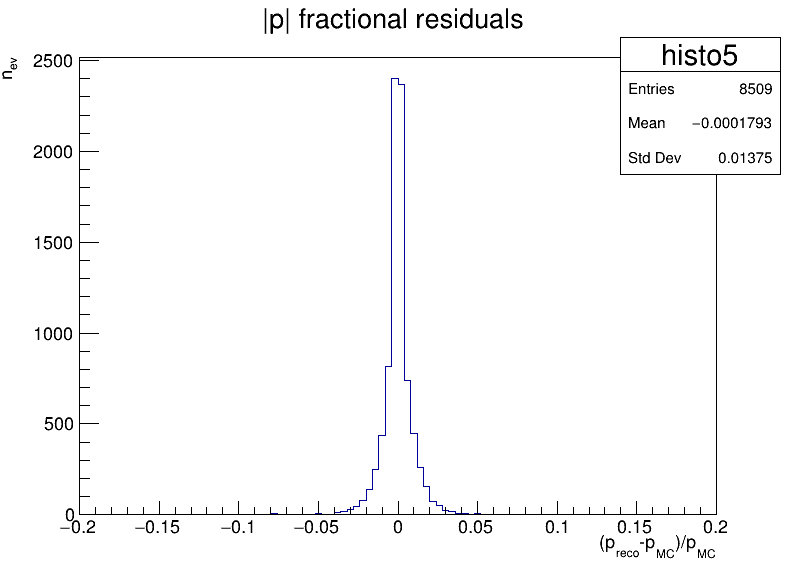

In [74]:
h0 = ROOT.TCanvas("h0","h0",800,600)
treeSeed.Draw("p0Seed-p0MC>>h0(100,-0.01,0.01)")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
h0.Draw()
save=folder+"Helix_p0_Resid"+".png"
h0.Print(save)

h1 = ROOT.TCanvas("h1","h1",800,600)
treeSeed.Draw("p1Seed-p1MC>>h1(100,-0.01,0.01)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
h1.Draw()
save=folder+"Helix_p1_Resid"+".png"
h1.Print(save)

h2 = ROOT.TCanvas("h2","h2",800,600)
treeSeed.Draw("Res2MC>>h2(100,-0.01,0.01)")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/p2_{MC};n_{ev}")
h2.Draw()
save=folder+"Helix_p2_Resid"+".png"
h2.Print(save)

h3 = ROOT.TCanvas("h3","h3",800,600)
treeSeed.Draw("Res3MC>>h3(100,-0.01,0.01)")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/p3_{MC};n_{ev}")
h3.Draw()
save=folder+"Helix_p3_Resid"+".png"
h3.Print(save)

h4 = ROOT.TCanvas("h4","h4",800,600)
treeSeed.Draw("Res4MC>>h4(100,-0.2,0.2)")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/p4_{MC};n_{ev}")
h4.Draw()
save=folder+"Helix_p4_Resid"+".png"
h4.Print(save)

cp = ROOT.TCanvas("myCanvasNamep","The Canvas Titlep",800,600)
treeSeed.Draw("RespMC>>histo5(100,-0.2,0.2)")
histo5 = ROOT.gDirectory.Get("histo5")
histo5.SetTitle("|p| fractional residuals;(p_{reco}-p_{MC})/p_{MC};n_{ev}")
cp.Draw()
save=folder+"Helix_p_Resid"+".png"
cp.Print(save)

 FCN=74.7184 FROM MIGRAD    STATUS=CONVERGED      54 CALLS          55 TOTAL
                     EDM=3.5999e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.72387e+02   3.59992e+00   1.26059e-02  -2.56997e-04
   2  Mean        -5.06925e-05   1.08071e-02   4.59170e-05  -4.42454e-03
   3  Sigma        9.88824e-01   7.45864e-03   8.75439e-06  -3.57302e-01
 FCN=241.915 FROM MIGRAD    STATUS=CONVERGED      58 CALLS          59 TOTAL
                     EDM=1.06094e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.72378e+02   3.60484e+00   2.28000e-02  -1.50178e-05
   2  Mean        -1.12458e-03   1.07061e-02   8.14018e-05  -8.96205e-03
   3  Sigma        9.69045e-01   7

Warning in <TCanvas::Constructor>: Deleting canvas with same name: h0
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Unit_p0.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h1
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Unit_p1.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h2
Info in <TCanvas::Print>: png file /home/federico/Documents/Universita/Federico_2020-2021/Aliwork/fastMCKalman/data/testTPCmuons/fixedpt1/MC_00005smear_noEloss_noMS_Seed_noEloss_noMS_Kalman_noEloss_noMS/Unit_p2.png has been created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: h3
Info in <TCanvas::Print>

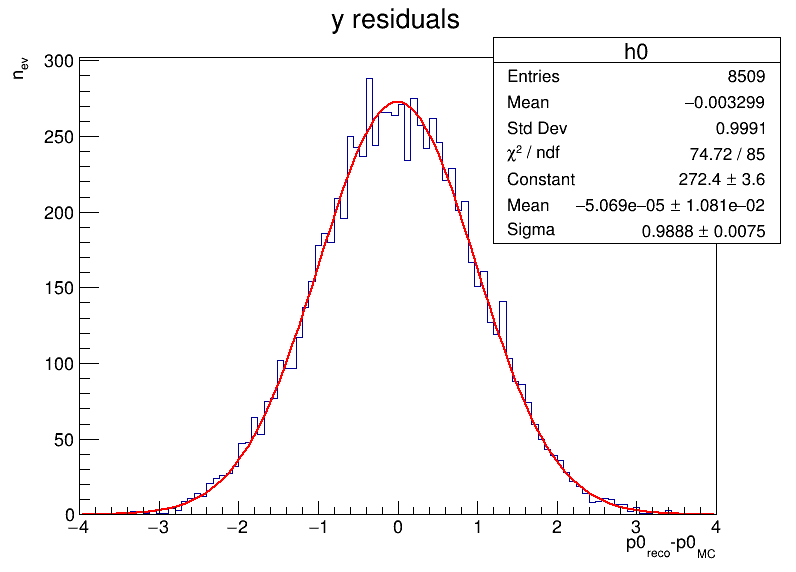

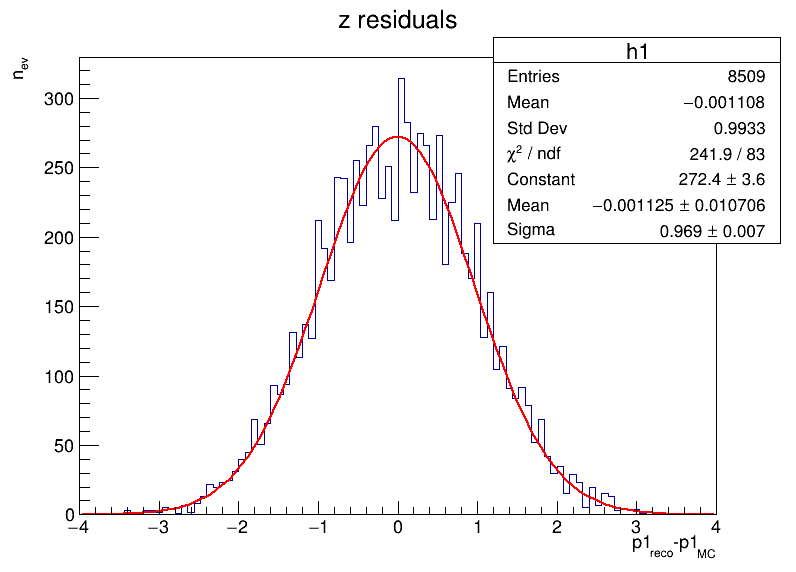

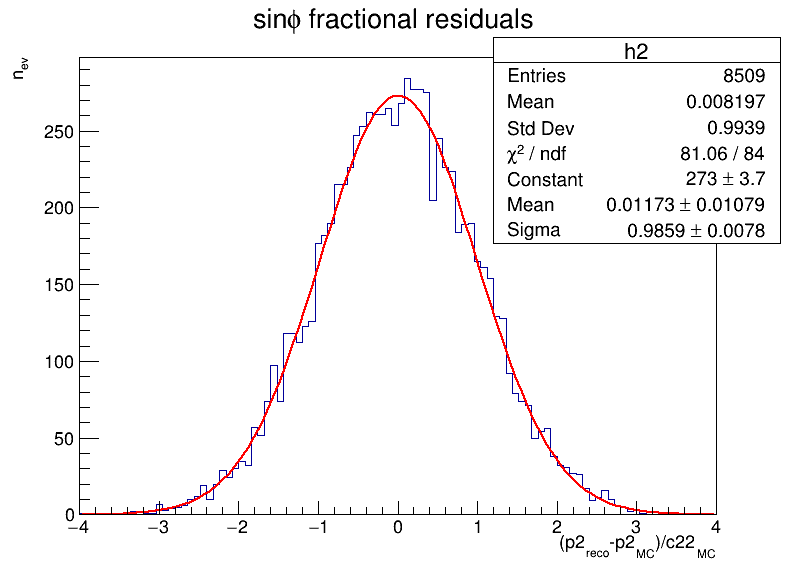

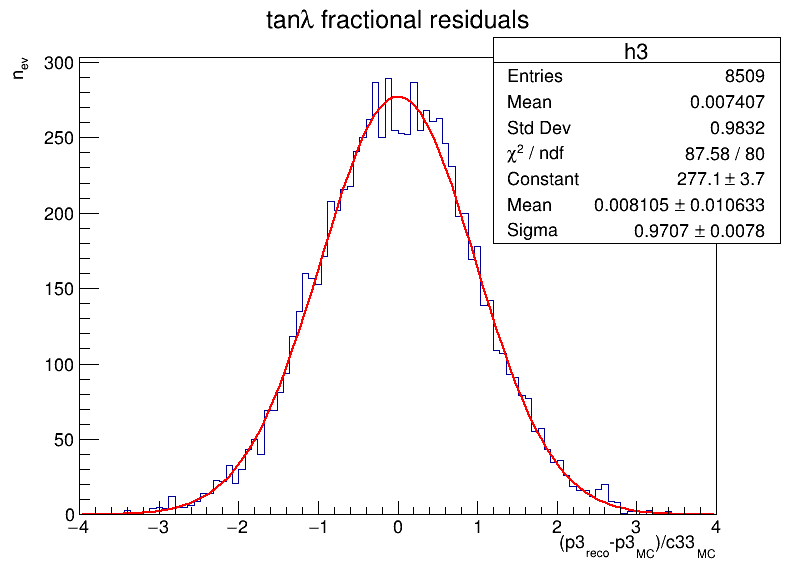

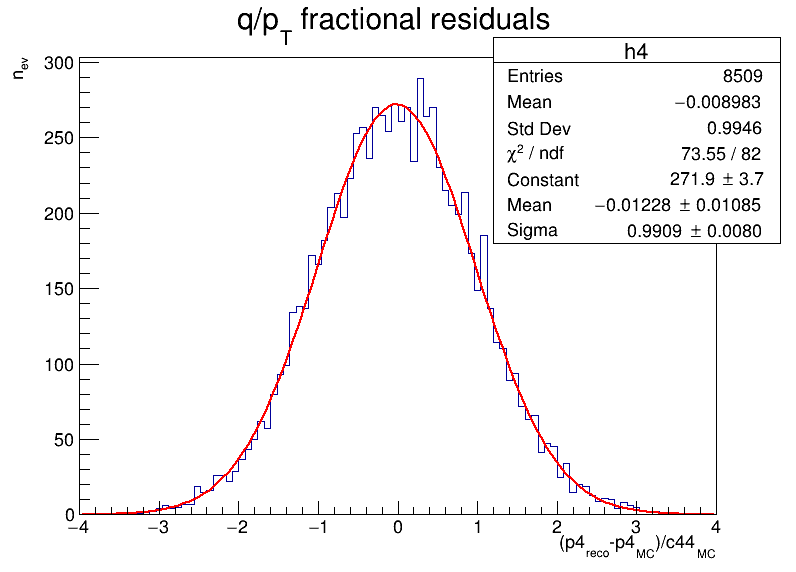

In [75]:
gStyle.SetOptStat(1)
gStyle.SetOptFit(1)

ch0 = ROOT.TCanvas("h0","h0",800,600)
#treeSeed.Draw("(p0Seed-p0MC)>>h0(100,-0.00005,0.00005)")
#treeSeed.Draw("(p0Seed-p0MC)>>h0")treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
treeSeed.Draw("Unit0MC>>h0(100,-4,4)")
histo0 = ROOT.gDirectory.Get("h0")
histo0.SetTitle("y residuals;p0_{reco}-p0_{MC};n_{ev}")
histo0.Fit("gaus")
ch0.Draw()
save=folder+"Unit_p0"+".png"
ch0.Print(save)

ch1 = ROOT.TCanvas("h1","h1",800,600)
treeSeed.Draw("Unit1MC>>h1(100,-4,4)")
#treeSeed.Draw("(p1Seed-p1MC)>>h1(100,-0.00005,0.00005)")
histo1 = ROOT.gDirectory.Get("h1")
histo1.SetTitle("z residuals;p1_{reco}-p1_{MC};n_{ev}")
histo1.Fit("gaus")
ch1.Draw()
save=folder+"Unit_p1"+".png"
ch1.Print(save)

ch2 = ROOT.TCanvas("h2","h2",800,600)
treeSeed.Draw("Unit2MC>>h2(100,-4,4)")
histo2 = ROOT.gDirectory.Get("h2")
histo2.SetTitle("sin#phi fractional residuals;(p2_{reco}-p2_{MC})/c22_{MC};n_{ev}")
histo2.Fit("gaus")
ch2.Draw()
save=folder+"Unit_p2"+".png"
ch2.Print(save)

ch3 = ROOT.TCanvas("h3","h3",800,600)
treeSeed.Draw("Unit3MC>>h3(100,-4,4)")
histo3 = ROOT.gDirectory.Get("h3")
histo3.SetTitle("tan#lambda fractional residuals;(p3_{reco}-p3_{MC})/c33_{MC};n_{ev}")
histo3.Fit("gaus")
ch3.Draw()
save=folder+"Unit_p3"+".png"
ch3.Print(save)

ch4 = ROOT.TCanvas("h4","h4",800,600)
treeSeed.Draw("Unit4MC>>h4(100,-4,4)")
histo4 = ROOT.gDirectory.Get("h4")
histo4.SetTitle("q/p_{T} fractional residuals;(p4_{reco}-p4_{MC})/c44_{MC};n_{ev}")
histo4.Fit("gaus")
ch4.Draw()
save=folder+"Unit_p4"+".png"
ch4.Print(save)